In [2]:
import requests
import re
import pandas as pd

In [3]:
url = 'https://movie.douban.com/subject/25875034/comments?status=P'
header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}
response = requests.get(url,headers=header)
html = response.text
html

'<!DOCTYPE html>\n<html lang="zh-CN" class="ua-windows ua-webkit">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta name="renderer" content="webkit">\n    <meta name="referrer" content="always">\n    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />\n    <title>\n\n舌尖上的中国 第三季 短评\n</title>\n    \n    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />\n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">\n    \n    <meta name="keywords" content="舌尖上的中国 第三季,影讯,排片,放映时间,电影票价,在线购票"/>\n    <meta name="description" content="舌尖上的中国 第三季短评" />\n    <meta name="mobile-agent" content="format=html5; url=https://m.douban.com/movie/subject/25875034/comments"/>\n    <script type="text/javascript" src="https://img1.doubanio.com/f/shire/2c0c1c6b83f9a457b0f38c38a32fc43a42ec9bad/js/do.js" data-cfg-autoload="false"></script>\n\n    <link

In [4]:
reg = '<span class="short">(.*?)</span>'
reg = re.compile(reg,re.S) # This is to allow us to match everything INCLUDING the \n
data = re.findall(reg,html)

['严重怀疑是“8848钛合金手机”、“小罐茶”的导演拍的',
 '真的难看 ，花打四门讲的这么牛逼，结果就是个炒白菜？陶瓷讲了半天，一点吃的都没有？要不叫舌尖上的炊具？就是难看，你讲烹具也要有个度啊，讲完连吃的也不放一点？还有，淘宝已经出现官方卖锅的了。你要说没利益我是不信的动不动就是大师大师的，我就是一个普通的小老百姓，看不懂了',
 '啥玩意儿？还没花生油广告好看',
 '第三集恶心到我了？那种破菜需要什么礼仪？奉行程朱理学是不是还要裹小脚啊！我呵呵！',
 '第一集看完了，文案水平忽高忽低；第一集主题是“器”，偏题严重，吃已经沦为配角；最重要的舌尖标签性bgm居然被舍弃了。不知道这期质量水平是这一季的平均水平还是最低水平，亦或是最好水平？\n\n四集弃。本以为看在这个ip的份上舌尖3还能守住最后的底线，那我还何必勉强给及格分呢',
 '网友：希望《舌尖上的中国》明白一件事：中华美食文化博大精深，既跟血浓于水的亲情没啥关系，也跟五千年来老百姓的勤劳勇敢没啥关系，真正的驱动力只是我们中国人管不住嘴，爱吃而已！不要上纲上线乱套故事了，请诚实一点，我们只是爱吃。',
 '大失水准，灵性全无。。文案节奏摄像，个个一塌糊涂。。充斥着广告植入和隐性营销。用爱调味的“大师”，泡菜撕下一块又扔回坛子；一块红烧肉配上高逼格盘子的可能菜价。还有电商的昂贵手工铁锅。。篡改历史，杜撰饮食文化，全株有毒的南天竹大量误导性镜头，给痛风患者饮用高嘌呤的肉汤，三无口红etc',
 '水盆羊肉成回坊的了？唐朝居然就形成回坊了，还建在了城中心？纪录片这么不考实还叫什么纪录片，好歹是讲美食的，制作纪录片的人真的实地考察美食了吗？随便百度一下都能知道渭南水盆羊肉吧……对于第二集中的内容感到失望。',
 '长安长回区，清真宴…广告私货，钵钵鸡串串麻辣烫不分，陕西的起源安去西安…北京“名吃”长这么大没听说过，哪个版本里都没听过，然后炒肝一个个尼玛全举着个勺儿…第三集您找一炒出来长得跟泔水可以论亲戚的茄鲞说好…穷奢极欲的大户原来好“色香味”里的这色…纪录片要写【实】，已经犯了大讳了',
 '最大的问题在于想要在一集中塞太多东西，以致于什么都讲得浅，有点流水账；中国厨师菜刀这一部分第一季就有，第二季变成大刀小刀，现在又变回一把菜刀，来回炒冷饭就是没好好拍点人文气息的东西。想念第一季的开头，新雨过后的云南，李

In [13]:
import time
import random
for i in range(0,100,20): # loading the first five pages of commentary data
    base_url = 'https://movie.douban.com/subject/25875034/comments?limit='+str(i)+'&status=P&sort=new_score'
    response = requests.get(base_url,headers=header)
    html = response.text
    reg = '<span class="short">(.*?)</span>'
    reg = re.compile(reg,re.S)
    data = re.findall(reg,html)
    if response.status_code==200:
        print("Retriving data from the page number"+ str((i//20)+1))
        for one_data in data:
              with open('舌尖上中国commentary.txt','a',encoding='utf-8') as f:
                  f.write(one_data+'\n')
    time.sleep(random.randint(5,10))
print("Retriving finished")

Retriving data from the page number1
Retriving data from the page number2
Retriving data from the page number3
Retriving data from the page number4
Retriving data from the page number5
Retriving finished


In [30]:
from wordcloud import WordCloud
f = open('舌尖上中国commentary.txt','rb')
text = f.read()
f.close()

In [16]:
text.decode('utf-8')

'啥玩意儿？还没花生油广告好看\r\n严重怀疑是“8848钛合金手机”、“小罐茶”的导演拍的\r\n预告片里解说配音是老狼\r\n就是唱同桌的你的老狼\r\n不是林更新\r\n不是潘粤明\r\n看过正片之后发现还是李老师\r\n一头雾水......\r\n真的难看 ，花打四门讲的这么牛逼，结果就是个炒白菜？陶瓷讲了半天，一点吃的都没有？要不叫舌尖上的炊具？就是难看，你讲烹具也要有个度啊，讲完连吃的也不放一点？还有，淘宝已经出现官方卖锅的了。你要说没利益我是不信的动不动就是大师大师的，我就是一个普通的小老百姓，看不懂了\r\n最大的问题在于想要在一集中塞太多东西，以致于什么都讲得浅，有点流水账；中国厨师菜刀这一部分第一季就有，第二季变成大刀小刀，现在又变回一把菜刀，来回炒冷饭就是没好好拍点人文气息的东西。想念第一季的开头，新雨过后的云南，李立宏清新不造作的温柔口白下，藏族女孩真挚又诚实的面孔。\r\n不好意思，不及格，乱，没重点，没审美，没灵魂\r\n第三集恶心到我了？那种破菜需要什么礼仪？奉行程朱理学是不是还要裹小脚啊！我呵呵！\r\n第一集看完了，文案水平忽高忽低；第一集主题是“器”，偏题严重，吃已经沦为配角；最重要的舌尖标签性bgm居然被舍弃了。不知道这期质量水平是这一季的平均水平还是最低水平，亦或是最好水平？\r\n\r\n四集弃。本以为看在这个ip的份上舌尖3还能守住最后的底线，那我还何必勉强给及格分呢\r\n网友：希望《舌尖上的中国》明白一件事：中华美食文化博大精深，既跟血浓于水的亲情没啥关系，也跟五千年来老百姓的勤劳勇敢没啥关系，真正的驱动力只是我们中国人管不住嘴，爱吃而已！不要上纲上线乱套故事了，请诚实一点，我们只是爱吃。\r\n熟悉的感动！七孔穿山灶，第一次知道，新奇。章丘铁锅，感人！ 豆瓣上一堆人差评《舌尖上的中国》第三季，声讨要第一季的配乐，第一季的感觉，第一季的味道，第一季的感人。得了吧，就是给了你想要的，你还会要其他的。反正我从第一季到现在，每一集都看得津津有味。我没食欲，没追求。\r\n靠，开场几分钟就想哭，刚吃完饭又饿了\r\n麻辣烫 石花膏 水盆羊肉 我的口水！！！\r\n看了后面几集真得来改下分数了\r\n但画面之精美，色泽之诱人，是没法儿回避的，所以都客观点下分数，好吗\r\n大失水准，灵性全无。。文案节奏摄像，个个一塌糊涂。。充斥

In [22]:
import jieba # A package that is used to divide up chinese words from a sentence
import os # Set the directory
%matplotlib inline #to render any matplotlib diagrams even if the plt. show() function is not called
os.chdir(r'D:\study\Programming\Web Crawl')
import matplotlib.pyplot as plt

In [18]:
words = jieba.lcut(text)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Novak\AppData\Local\Temp\jieba.cache
Loading model cost 0.526 seconds.
Prefix dict has been built successfully.


In [27]:
text_space = ' '.join(words) #the wordcloud package only works with words that are separated by space

In [53]:
background_image = plt.imread('china.png')

In [54]:
w=WordCloud(width=2000,height=1500,font_path='C:\Windows\Fonts\FZSTK.TTF',background_color = 'white',mask=background_image)

In [55]:
wordcloud = w.generate(text_space)

C:\Users\Novak\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:1000: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


(-0.5, 258.5, 193.5, -0.5)

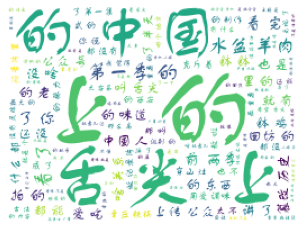

In [56]:
plt.imshow(wordcloud)
plt.axis('off')